In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
fraud= pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Distribution of Class Variable

<IPython.core.display.Javascript object>

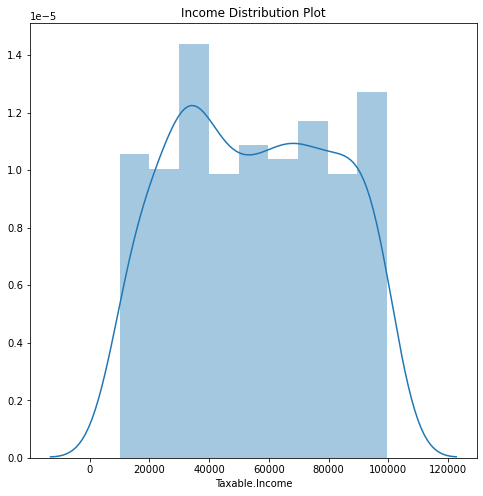

In [163]:
plt.figure(figsize=(8,8))
plt.title('Income Distribution Plot')
sns.distplot(fraud['Taxable.Income'])

In [7]:
#Changing the categorical variables into dummies.
df = pd.get_dummies(fraud)

#Converting the Target variable i.e. Taxable Income into Categorical (As mentioned in the problem statement)
df['Category'] = pd.cut(df['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)


df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [103]:
x = df.iloc[:,1:10]
y = df.iloc[:,10]

In [104]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [105]:
y_train.value_counts()

Good     336
Risky     84
Name: Category, dtype: int64

In [106]:
y_test.value_counts()

Good     140
Risky     40
Name: Category, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

**Iteration-1: Max Depth = 2**

In [107]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test) # predicting on test data set 

In [108]:
#Predicting on test data
pred_test1 = model1.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))

#Predicting on train data
pred_train1 = model1.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

print('Model leaves:',model1.get_n_leaves(),'\n',
      pd.Series(preds1).value_counts(),'\n','\n')


Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8
Model leaves: 4 
 Good    180
dtype: int64 
 



#### Iteration-2: Max Depth = 3

In [109]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test) # predicting on test data set 

In [110]:

#Predicting on test data
pred_test2 = model2.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))

#Predicting on train data
pred_train2 = model2.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train))

print('Model leaves:',model2.get_n_leaves(),'\n',
      pd.Series(preds2).value_counts(),'\n','\n')


Test data Accuracy is: 0.7722222222222223
Train data Accuracy is: 0.8047619047619048
Model leaves: 7 
 Good     179
Risky      1
dtype: int64 
 



####  Iteration-3: Max Depth = 4

In [111]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test) # predicting on test data set 


#Predicting on test data
pred_test3 = model3.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))

#Predicting on train data
pred_train3 = model3.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

print('Model leaves:',model3.get_n_leaves(),'\n',
      pd.Series(preds3).value_counts(),'\n','\n')


Test data Accuracy is: 0.7611111111111111
Train data Accuracy is: 0.8095238095238095
Model leaves: 10 
 Good     177
Risky      3
dtype: int64 
 



#### Iteration-4: Max Depth = 5

In [112]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)
preds4 = model4.predict(x_test) # predicting on test data set 


#Predicting on test data
pred_test4 = model4.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test))

#Predicting on train data
pred_train4 = model4.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train))

print('Model leaves:',model4.get_n_leaves(),'\n',
      pd.Series(preds4).value_counts(),'\n','\n')


Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.819047619047619
Model leaves: 15 
 Good     178
Risky      2
dtype: int64 
 



#### Iteration-5: Max Depth = 6

In [113]:
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5 = model5.predict(x_test) # predicting on test data set 

#Predicting on test data
pred_test5 = model5.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test5==y_test))

#Predicting on train data
pred_train5 = model5.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train5==y_train))

print('Model leaves:',model5.get_n_leaves(),'\n',
      pd.Series(preds5).value_counts(),'\n','\n')


Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8238095238095238
Model leaves: 20 
 Good     178
Risky      2
dtype: int64 
 



#### Iteration-6: Max Depth = 7

In [114]:
model6 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model6.fit(x_train,y_train)
preds6 = model6.predict(x_test) # predicting on test data set 


#Predicting on test data
pred_test6 = model6.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test6==y_test))

#Predicting on train data
pred_train6 = model6.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train6==y_train))

print('Model leaves:',model6.get_n_leaves(),'\n',
      pd.Series(preds6).value_counts(),'\n','\n')


Test data Accuracy is: 0.7277777777777777
Train data Accuracy is: 0.8357142857142857
Model leaves: 27 
 Good     167
Risky     13
dtype: int64 
 



**The classifier model at the end of iteration 1 with depth = 2 has the max accuracy i.e. 77.77 %**

In [115]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(preds1,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.78      0.88       180
       Risky       0.00      0.00      0.00         0

    accuracy                           0.78       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.78      0.88       180



# Isolation Forest


We'll perform EDA to find outlier and see if that can increase the model accuracy

In [118]:
from sklearn.ensemble import IsolationForest

In [119]:
newdf= pd.get_dummies(fraud)

In [120]:
newdf

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [121]:
# training the model
clf = IsolationForest(random_state=40,contamination=.01)
clf.fit(newdf)

IsolationForest(contamination=0.01, random_state=40)

In [122]:
# predictions
y_pred_outliers = clf.predict(newdf)

In [123]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [124]:
newdf['scores']=clf.decision_function(newdf.iloc[:,0:10])
newdf['anomaly']=clf.predict(newdf.iloc[:,0:10])
newdf

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,0.068081,1
1,33700,134075,18,0,1,1,0,0,0,1,0.068363,1
2,36925,160205,30,1,0,0,1,0,0,1,0.012120,1
3,50190,193264,15,0,1,0,0,1,0,1,0.066546,1
4,81002,27533,28,1,0,0,1,0,1,0,0.030292,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0.050155,1
596,69967,55369,2,0,1,1,0,0,0,1,0.052740,1
597,47334,154058,0,1,0,1,0,0,0,1,0.015952,1
598,98592,180083,17,0,1,0,1,0,1,0,0.005133,1


# Printing outliers

In [125]:
newdf[newdf['anomaly']==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
21,14310,29106,7,0,1,1,0,0,0,1,-0.000964,-1
34,12514,183767,1,0,1,1,0,0,0,1,-0.003339,-1
280,17783,33184,1,1,0,1,0,0,1,0,-0.011553,-1
414,97980,27300,1,1,0,1,0,0,0,1,-0.003410,-1
474,99128,80729,0,0,1,1,0,0,1,0,-0.005492,-1
541,12453,191874,30,0,1,1,0,0,0,1,-0.009326,-1


In [129]:
df1 = newdf.drop([21,34,280,414,474,541],axis=0).reset_index(drop=True)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,0.068081,1
1,33700,134075,18,0,1,1,0,0,0,1,0.068363,1
2,36925,160205,30,1,0,0,1,0,0,1,0.012120,1
3,50190,193264,15,0,1,0,0,1,0,1,0.066546,1
4,81002,27533,28,1,0,0,1,0,1,0,0.030292,1
...,...,...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1,0.050155,1
590,69967,55369,2,0,1,1,0,0,0,1,0.052740,1
591,47334,154058,0,1,0,1,0,0,0,1,0.015952,1
592,98592,180083,17,0,1,0,1,0,1,0,0.005133,1


In [130]:
#Converting the Target variable i.e. Taxable Income into Categorical
df1['Category'] = pd.cut(df1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)

df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly,Category
0,68833,50047,10,1,0,0,0,1,0,1,0.068081,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,0.068363,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,0.012120,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,0.066546,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,0.030292,1,Good


In [131]:
x1 = df1.iloc[:,1:10]
y1 = df1.iloc[:,12]

In [132]:
x1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
589,39492,7,0,1,1,0,0,0,1
590,55369,2,0,1,1,0,0,0,1
591,154058,0,1,0,1,0,0,0,1
592,180083,17,0,1,0,1,0,1,0


# Building Decision Tree Classifier using Entropy Criteria

In [133]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.25,random_state=40)

Since last time the iteration 1 and 2 had the highest accuracy, so we'll make new models with this new dataframe, i.e. with max depth = 2 & 3

In [134]:
model11 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model11.fit(x_train,y_train)
preds11 = model11.predict(x_test) # predicting on test data set 


#Predicting on test data
pred_test11 = model11.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test11==y_test))

#Predicting on train data
pred_train11 = model11.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train11==y_train))

print('Model leaves:',model11.get_n_leaves(),'\n',
      pd.Series(preds11).value_counts(),'\n','\n')


Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8
Model leaves: 4 
 Good    180
dtype: int64 
 



In [135]:
model12 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model12.fit(x_train,y_train)
preds12 = model12.predict(x_test) # predicting on test data set 


#Predicting on test data
pred_test12 = model12.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test12==y_test))

#Predicting on train data
pred_train12 = model12.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train12==y_train))

print('Model leaves:',model12.get_n_leaves(),'\n',
      pd.Series(preds12).value_counts(),'\n','\n')


Test data Accuracy is: 0.7722222222222223
Train data Accuracy is: 0.8047619047619048
Model leaves: 7 
 Good     179
Risky      1
dtype: int64 
 



**Since the accuracy hasn't improved, we can finalise the model 1 as our final model.**

# Building Decision Tree Classifier (CART) using Gini Criteria

In [136]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [137]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [139]:
#Prediction and computing the accuracy
predG=model_gini.predict(x_test)

#Predicting on test data
predG_test1 = model_gini.predict(x_test)

#Accuracy on test data
print('Test data Accuracy is:',np.mean(predG_test1==y_test))

#Predicting on train data
predG_train1 = model_gini.predict(x_train)

#Accuracy on train data
print('Train data Accuracy is:',np.mean(predG_train1==y_train))

print('Model leaves:',model_gini.get_n_leaves(),'\n',
      pd.Series(predG).value_counts(),'\n','\n')


Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8
Model leaves: 4 
 Good    180
dtype: int64 
 



**Same Accuracy is achieved using CART as well i.e 77.77%**

# Let's Visualize both the Decision Trees

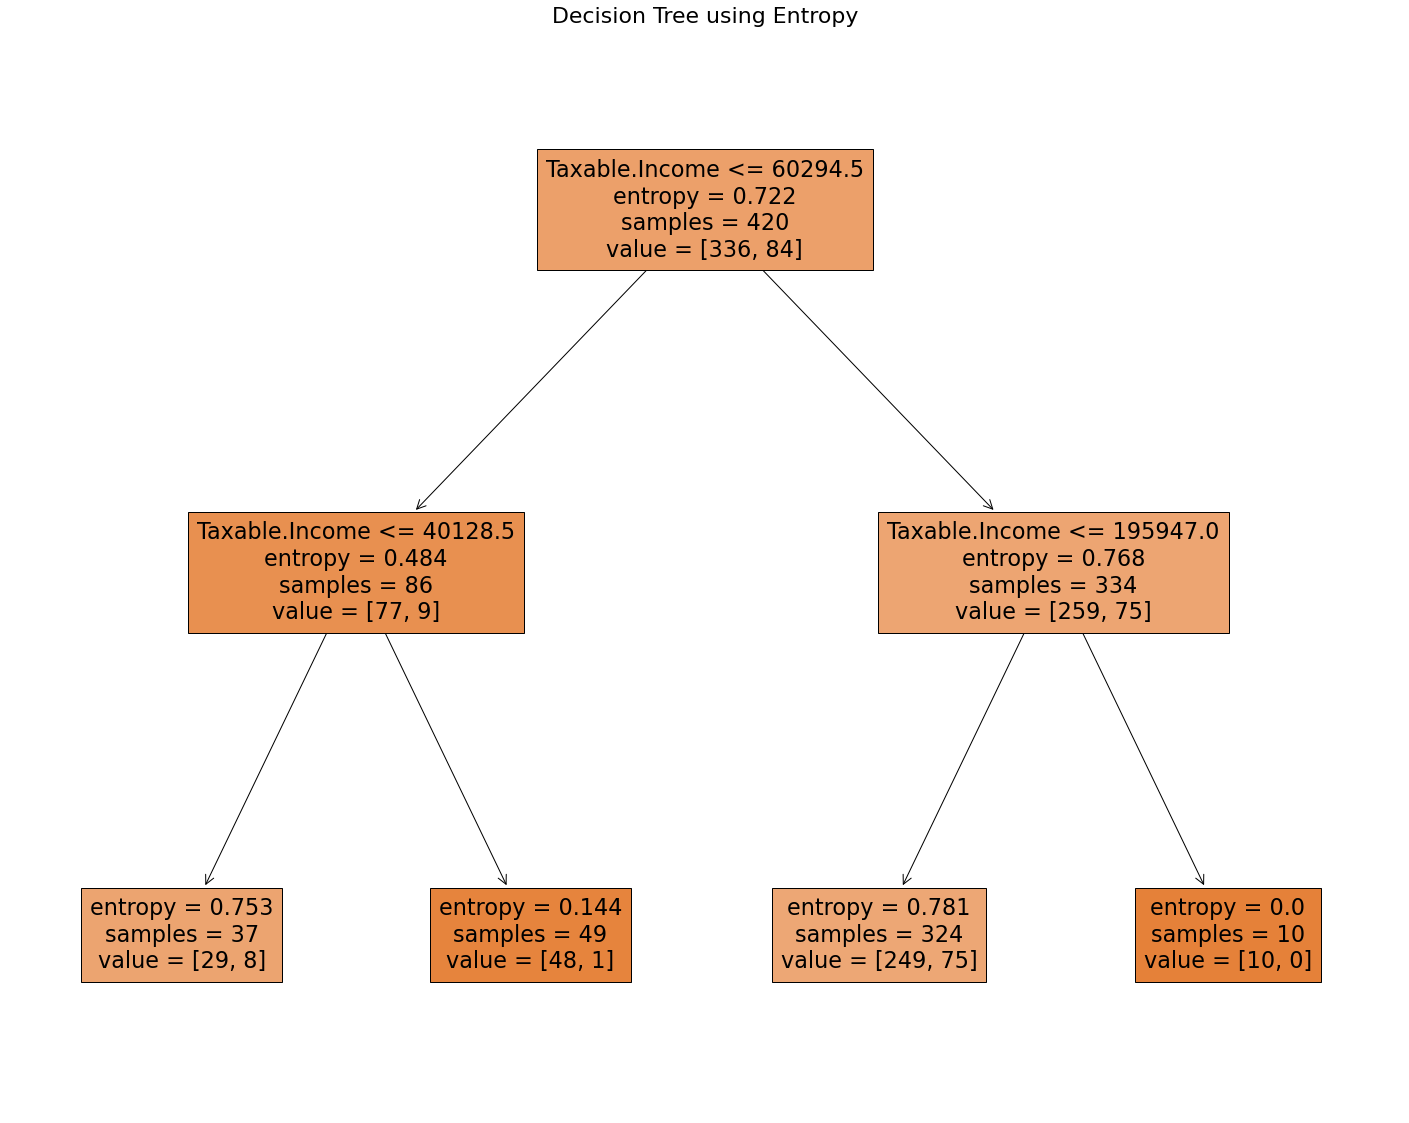

In [140]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)
plt.savefig('Fraud Check DT_Entropy.png')

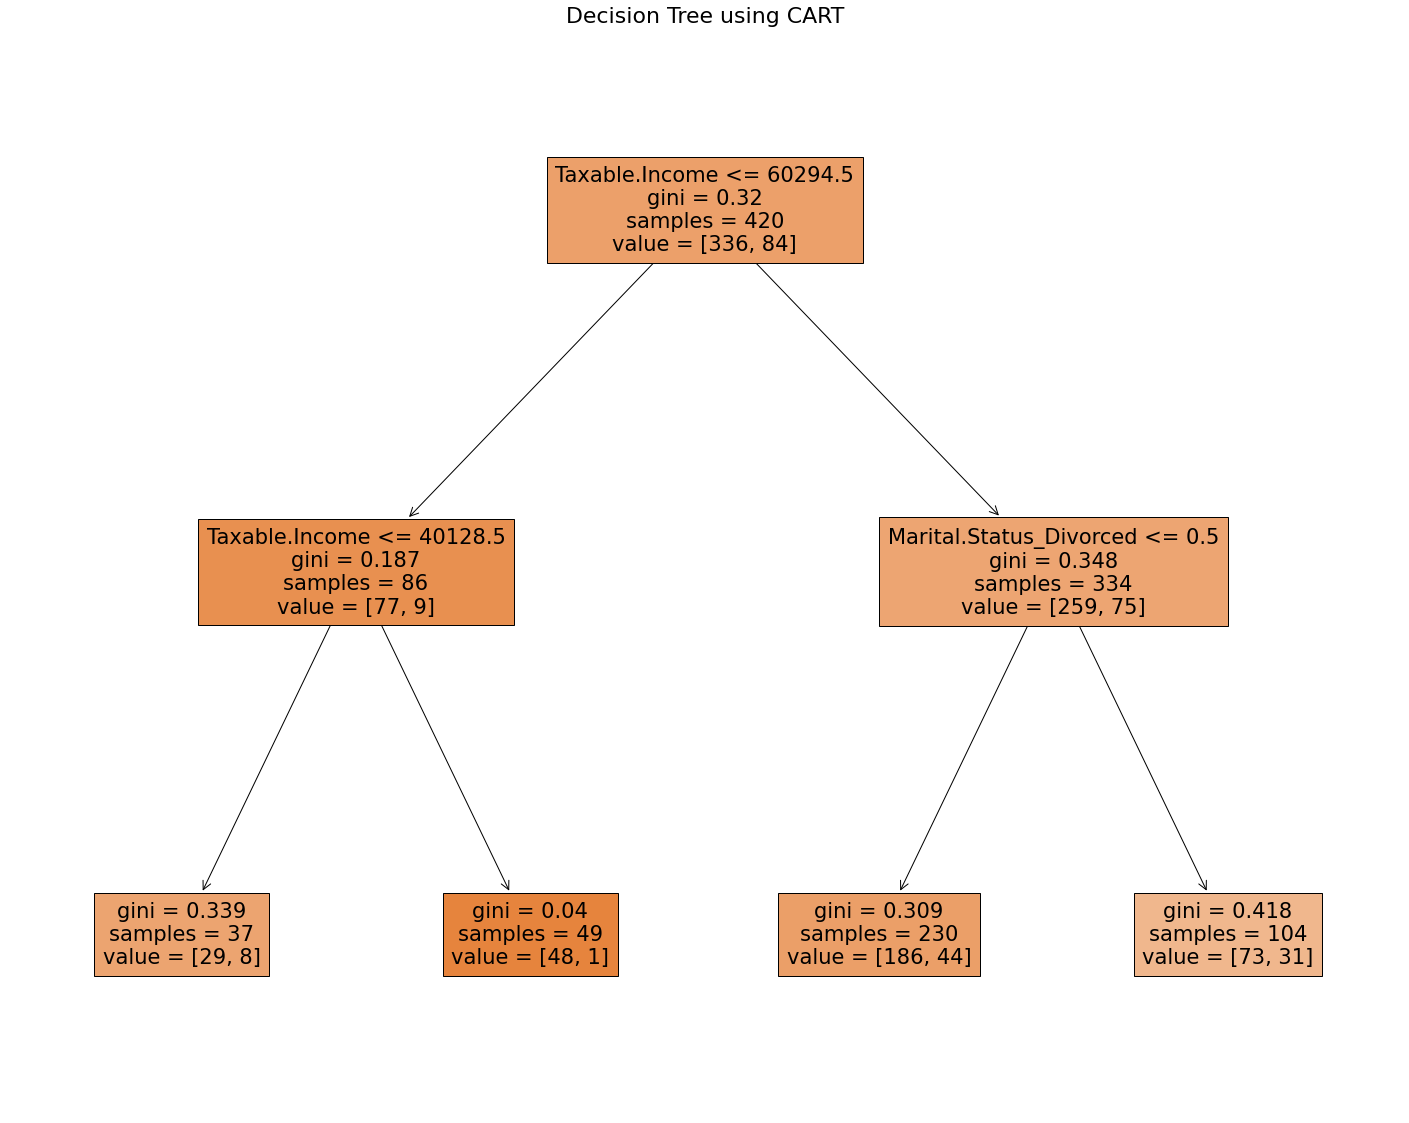

In [141]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using CART',fontsize=22)
plt.savefig('Fraud Check DT_CART.png')

# Feature Egineering

In [142]:
dt = pd.read_csv("Fraud_check.csv")
dt.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [143]:
dt['Marital.Status'] = dt['Marital.Status'].apply(lambda x: 0 if x=='Single' else 1)
dt['Undergrad'] = dt['Undergrad'].apply(lambda x: 0 if x=='no' else 1)
dt['Urban'] = dt['Urban'].apply(lambda x: 0 if x=='no' else 1)
dt.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,0,68833,50047,10,1
1,1,1,33700,134075,18,1
2,1,1,36925,160205,30,1
3,1,0,50190,193264,15,1


In [144]:
#Converting the taxes column into categorical variable
taxes = []
for value in dt["Taxable.Income"]:
    if value<=30000:
        taxes.append("Risky")
    else:
        taxes.append("good")
        
dt["taxes"]= taxes

In [145]:
#dropping the sales column
dt=dt.drop(['Taxable.Income'], axis=1)
dt.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxes
0,1,0,50047,10,1,good
1,1,1,134075,18,1,good
2,1,1,160205,30,1,good
3,1,0,193264,15,1,good
4,1,1,27533,28,1,good


In [146]:
#preparing the data
X = dt.drop('taxes', axis=1)
y = dt['taxes']

In [147]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2, random_state=42)

In [148]:
#feature engineering

X_train_fe = X_train.drop(['Undergrad','Marital.Status','Work.Experience','Urban'],axis=1)
X_test_fe = X_test.drop(['Undergrad','Marital.Status','Work.Experience','Urban'],axis=1)

In [149]:
#DecisionTreeClassifier with entropy 

clf_en_fe = DecisionTreeClassifier(criterion='entropy')


# fit the model
clf_en_fe.fit(X_train_fe, y_train)

DecisionTreeClassifier(criterion='entropy')

In [150]:
y_pred_train_en_fe = clf_en_fe.predict(X_train_fe)

In [151]:
y_pred_test_en_fe = clf_en_fe.predict(X_test_fe)

In [152]:
print('Training data: {:.4f}'.format(clf_en_fe.score(X_train_fe, y_train)))

print('Test data: {:.4f}'.format(clf_en_fe.score(X_test_fe, y_test)))

Training data: 0.9979
Test data: 0.6917


**Even with feature engineering the accuracy for test has not imporved.**

# XGB boosting technique

In [153]:
import xgboost as xgb
import pandas as pd

In [154]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 20)
xgb1.fit(X_train,y_train)
train_pred_xgb = xgb1.predict(X_train)

[22:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
import numpy as np
accuracy_train_data = np.mean(train_pred_xgb==y_train) 
print('Training Accuracy: {:.4f}'.format(accuracy_train_data))

Training Accuracy: 0.8021


In [160]:
test_pred_xgb=xgb1.predict(X_test)

In [161]:
accuracy_test_data=np.mean(test_pred_xgb==y_test)
print('Testing Accuracy: {:.4f}'.format(accuracy_test_data))

Testing Accuracy: 0.7917


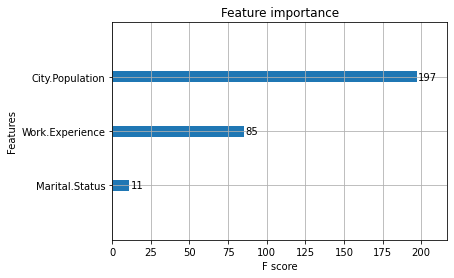

In [162]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

# Insights:

+ Model accuracy remained same even after trying Entroy, CART, Isolation Forest and Feature engineering i.e **77.77%**
+ When we tried XGB the model Accuracy increased to 79.17%
+ Most important features were found to be **City.Population and Work.Experience.**
+ With these features we can futher predict which of the people are likely to be fraud.